In [95]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [96]:
marvel_dc = pd.read_csv('final.csv')


In [97]:
marvel_dc

,Unnamed: 0,NAME,ID,ALIGN,EYE,HAIR,SEX,GSM,APPEARANCES,YEAR,STUDIO
0,0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Heterosexual,4043,1962,MARVEL
1,1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Heterosexual,3360,1941,MARVEL
2,2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,3061,1974,MARVEL
3,3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,2961,1963,MARVEL
4,4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Heterosexual,2258,1950,MARVEL
...,...,...,...,...,...,...,...,...,...,...,...
18124,6523,Carnie Callahan (New Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,1,1944,DC
18125,6525,Frederick Devere (New Earth),Public Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,1,1941,DC
18126,6526,Green Arrow (Oliver Queen),Secret Identity,Good Characters,Green Eyes,Blond Hair,Male Characters,Heterosexual,1,1941,DC
18127,6528,Robert Mason (New Earth),Secret Identity,Neutral Characters,Black Eyes,Black Hair,Male Characters,Heterosexual,1,1941,DC


In [98]:
marvel_dc.columns

Index(['Unnamed: 0', 'NAME', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM',
       'APPEARANCES', 'YEAR', 'STUDIO'],
      dtype='object')

In [134]:
y = marvel_dc["ALIGN"]
X = marvel_dc.drop(columns=["Unnamed: 0", "ALIGN", "NAME", "APPEARANCES", "YEAR"])
X.head(10)


,ID,EYE,HAIR,SEX,GSM,STUDIO
0,Secret Identity,Hazel Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
1,Public Identity,Blue Eyes,White Hair,Male Characters,Heterosexual,MARVEL
2,Public Identity,Blue Eyes,Black Hair,Male Characters,Heterosexual,MARVEL
3,Public Identity,Blue Eyes,Black Hair,Male Characters,Heterosexual,MARVEL
4,No Dual Identity,Blue Eyes,Blond Hair,Male Characters,Heterosexual,MARVEL
5,Public Identity,Blue Eyes,No Hair,Male Characters,Heterosexual,MARVEL
6,Public Identity,Brown Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
7,Public Identity,Brown Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
8,Public Identity,Brown Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
9,Public Identity,Blue Eyes,Blond Hair,Male Characters,Heterosexual,MARVEL


In [135]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['ID_Identity Unknown', 'ID_Known to Authorities Identity',
       'ID_No Dual Identity', 'ID_Public Identity', 'ID_Secret Identity',
       'EYE_Amber Eyes', 'EYE_Auburn Hair', 'EYE_Black Eyeballs',
       'EYE_Black Eyes', 'EYE_Blue Eyes', 'EYE_Brown Eyes',
       'EYE_Compound Eyes', 'EYE_Gold Eyes', 'EYE_Green Eyes', 'EYE_Grey Eyes',
       'EYE_Hazel Eyes', 'EYE_Magenta Eyes', 'EYE_Multiple Eyes',
       'EYE_No Eyes', 'EYE_One Eye', 'EYE_Orange Eyes',
       'EYE_Photocellular Eyes', 'EYE_Pink Eyes', 'EYE_Purple Eyes',
       'EYE_Red Eyes', 'EYE_Silver Eyes', 'EYE_Variable Eyes',
       'EYE_Violet Eyes', 'EYE_White Eyes', 'EYE_Yellow Eyeballs',
       'EYE_Yellow Eyes', 'HAIR_Auburn Hair', 'HAIR_Bald', 'HAIR_Black Hair',
       'HAIR_Blond Hair', 'HAIR_Blue Hair', 'HAIR_Bronze Hair',
       'HAIR_Brown Hair', 'HAIR_Dyed Hair', 'HAIR_Gold Hair',
       'HAIR_Green Hair', 'HAIR_Grey Hair', 'HAIR_Light Brown Hair',
       'HAIR_Magenta Hair', 'HAIR_No Hair', 'HAIR_Orange Hai

,ID_Identity Unknown,ID_Known to Authorities Identity,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity,EYE_Amber Eyes,EYE_Auburn Hair,EYE_Black Eyeballs,EYE_Black Eyes,EYE_Blue Eyes,...,SEX_Unknown,GSM_Bisexual Characters,GSM_Genderfluid Characters,GSM_Heterosexual,GSM_Homosexual Characters,GSM_Pansexual Characters,GSM_Transgender Characters,GSM_Transvestites,STUDIO_DC,STUDIO_MARVEL
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18124,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
18125,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
18126,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
18127,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [136]:
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 1, 2, ..., 1, 2, 1])

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5960576640188291
Testing Score: 0.5490844915067284


In [124]:
feature_importances = clf.feature_importances_

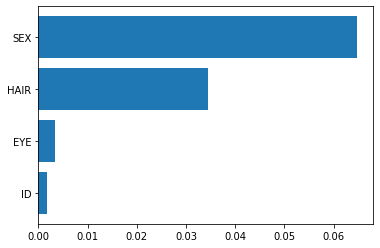

In [125]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

ax.barh(y=cols, width=width)

plt.show()

In [106]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [107]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_dummies), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [108]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5636952044719035
Testing Score: 0.5497463048753585


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [131]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_test_scaled)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5863489261547514
Testing Score: 0.543789984557688


In [41]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.47867019711679903
Testing Score: 0.4687844694462828


In [132]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5863489261547514
Testing Score: 0.542245753364218


In [128]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test_scaled)

In [129]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.12905360688285902


In [130]:
print(f'Training Score: {gnb.score(X_train_scaled, y_train)}')
print(f'Testing Score: {gnb.score(X_test_scaled, y_test)}')

Training Score: 0.13128861429832303
Testing Score: 0.12905360688285902


In [139]:
import tensorflow as tf

In [153]:
num_features = len(X_train_scaled[0])
hidden_nodes_1 = 40
hidden_nodes_2 = 20
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=num_features, activation='relu'))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 40)                3040      
                                                                 
 dense_40 (Dense)            (None, 20)                820       
                                                                 
 dense_41 (Dense)            (None, 1)                 21        
                                                                 
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
425/425 [==============================] - 1s 2ms/step - loss: 0.5883 - accuracy: 0.4743
Epoch 2/25
425/425 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.5051
Epoch 3/25
425/425 [==============================] - 1s 2ms/step - loss: 0.5187 - accuracy: 0.5051
Epoch 4/25
425/425 [==============================] - 1s 2ms/step - loss: 0.4985 - accuracy: 0.5079
Epoch 5/25
425/425 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.5074
Epoch 6/25
425/425 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.5115
Epoch 7/25
425/425 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.5092
Epoch 8/25
425/425 [==============================] - 1s 2ms/step - loss: 0.2314 - accuracy: 0.5127
Epoch 9/25
425/425 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.5168
Epoch 10/25
425/425 [==============================] - 1s 2ms/step - loss: -0.3257 - accuracy: 0.509